# Hydra Multi-Asset Verification Test

## Introduction to Uniswap
>Uniswap is an automated market maker for exchanging ERC20 tokens. Anyone can become a liquidity provider, and invest in the liquidity pool of an ERC20 token. This allows other users to trade that token for other tokens at an exchange rate based on their relative availibility. When a token trade is executed, a small fee is paid to the liquidity providers that enabled the transaction.
https://uniswap.io/

There are basically eight ways (_mechanisms_) in which an agent can interact with an instance of Uniswap (https://github.com/Uniswap/uniswap-v1/blob/master/contracts/uniswap_exchange.vy):
1. `addLiquidity`: deposit ETH and tokens in the liquidity pool; mint UNI tokens - "shares" of that Uniswap instance - in exchange;
1. `removeLiquidity`: burn UNI tokens; withdraw a proportional amount of ETH and tokens in exchange;
1. `ethToTokenInput`: user specifies an exact amount of ETH they send; receives corresponding amount of tokens
1. `ethToTokenOutput`: user sends some ETH and specifies an exact amount of tokens they want to buy; Uniswap refunds ETH sent in excess
1. `tokenToEthInput`: user specifies an exact amount of tokens they send; receives corresponding amount of ETH
1. `tokenToEthOutput`: user specifies an exact amount of ETH they want to buy; Uniswap takes the corresponding amount of tokens from the user account
1. `tokenToTokenInput`: user specifies an exact amount of "token A" they send; receives corresponding amount of "token B" (effectively a `tokenToEthInput` in instance A combined with a `ethToTokenInput` in instance B)
1. `tokenToTokenOutput`: user specifies an exact amount of "token B˜ they want to buy; Uniswap takes the corresponding amount of "token A" from the user account (effectively a `ethToTokenOutput` in instance B combined with a `tokenToEthOutput` in instance A)

## Limitations and simplifications of this model
* When triggering mechanisms, Uniswap users may include conditions they would like to apply to the transaction. For example, they could define a minimum amount of UNI tokens they wish to receive as a result of adding liquidity to the pool; or the maximum number of tokens they are willing to pay for the amount of ETH requested in a `tokenToEthOutput` operation; or a deadline after which the transaction should not be processed. **This simplified model does not account for this kind conditioning.**

* The `ethToTokenOutput`, `tokenToEthOutput` mechanisms are not implemented. **All swaps are treated as of the "input defined" type.**

* The `tokenToToken` mechanism are not implemented, as they are merely a `tokenToEth` in the context of a single Uniswap instance.

* **User _behavior_ has not been modeled**. User _actions_ are derived from the history of events of the Uniswap instance being analyzed.



In order to better mimic the behavior of Uniswap, we need to pay special attention to two things:
1. make explicit that we want numbers to be treated as integers by the Python interpreter - there are probably more casts to `int` than needed throughout the code;
1. Uniswap was coded in Vyper, where the `/` operator applied to integer variables returns the dividend of the division. In order to achieve the same in Python, we need to use _"floor division"_ (`//`) instead of _"true division"_ (`/`).

In [1]:
expr = '10000000000000000000 / 5000000000000000001'
print(f'{expr} = {eval(expr)}')
expr = 'int(10000000000000000000 / 5000000000000000001)'
print(f'{expr} = {eval(expr)}')
expr = '10000000000000000000 // 5000000000000000001'
print(f'{expr} = {eval(expr)}')

10000000000000000000 / 5000000000000000001 = 2.0
int(10000000000000000000 / 5000000000000000001) = 2
10000000000000000000 // 5000000000000000001 = 1


## Model File structure
* Uniswap_Model.ipynb
* model

In the model folder there exist 4 files and a parts folder, the [config.py](model/config.py), [partial_state_update_block.py](model/partial_state_update_block.py), [run.py](model/run.py), and [state_variables.py](state_variables.py). The [config.py](model/config.py) contains the simulation configurations, aggregating the partial states, and the state variables. The [partial_state_update_block.py](model/partial_state_update_block.py) contains the partial state update blocks and how they update the state variables. [state_variables.py](state_variables.py) defines the state variables and [run.py](model/run.py) actually runs the simulation. 

The components of the model live within the parts subfolder as:

* [system.py](model/parts/system.py)
* [utils.py](model/parts/utils.py)
* uniswap_events.pickle* 

The initial parameters and hyperparameters of the system are defined in [sys_params.py](model/sys_params.py) and helper functions, plots, etc. are in the [utils.py](model/parts/utils.py).


### Model dataset*


## Run Model

In [2]:
# Dependences
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Experiments
from model import run
from model.parts.utils import *
from model.plot_utils import *

pd.options.display.float_format = '{:.2f}'.format

%matplotlib inline

df = run.run()
rdf = run.postprocessing(df)
# rdf = df # debugging substeps



                  ___________    ____
  ________ __ ___/ / ____/   |  / __ \
 / ___/ __` / __  / /   / /| | / / / /
/ /__/ /_/ / /_/ / /___/ ___ |/ /_/ /
\___/\__,_/\__,_/\____/_/  |_/_____/
by cadCAD

Execution Mode: local_proc
Configuration Count: 1
Dimensions of the first simulation: (Timesteps, Params, Runs, Vars) = (1000, 5, 1, 15)
Execution Method: local_simulations
SimIDs   : [0]
SubsetIDs: [0]
Ns       : [0]
ExpIDs   : [0]
Execution Mode: single_threaded
Total execution time: 14.39s


## Analysis

For information on how to access and analysis data from the Eth/Dai Uniswap smart contract, visit our sister notebook [here](Uniswap_EthDai_Exchange_Data.ipynb).




In [3]:
model_history = rdf[['UNI_Qi', 'UNI_Ri', 'UNI_Si']]
model_history.columns = ['model_UNI_Qi', 'model_UNI_Ri', 'model_UNI_Si']

uniswap_j = rdf[['UNI_Qj', 'UNI_Rj', 'UNI_Sj']]
uniswap_j.columns = ['UNI_Qj', 'UNI_Rj', 'UNI_Sj']

hydra = rdf[['Q', 'H', 'Sq']]
hydra.columns = ['Hydra_Q', 'Hydra_H', 'Hydra_Sq']

In [4]:
# for t in range(20):
#     print(rdf['asset'][t])

Despite the simplifications, the outputs of the model are very similar to the real data

In [5]:
print(rdf.pool[rdf.first_valid_index()])

<class 'model.parts.asset_utils.Asset'>: {'pool': {'i': {'R': 1000010, 'S': 200002000000.0, 'W': 200002000000.0, 'P': 0.19999999999999998}, 'j': {'R': 1000020, 'S': 200004000000.0, 'W': 200004000000.0, 'P': 0.19999999999999998}}}


In [6]:
rdf.pool[rdf.first_valid_index()].pool

{'i': {'R': 1000010,
  'S': 200002000000.0,
  'W': 200002000000.0,
  'P': 0.19999999999999998},
 'j': {'R': 1000020,
  'S': 200004000000.0,
  'W': 200004000000.0,
  'P': 0.19999999999999998}}

In [7]:
rdf.pool[rdf.first_valid_index()*10].pool

{'i': {'R': 1000100,
  'S': 200020000000.0,
  'W': 200020000000.0,
  'P': 0.19999999999999998},
 'j': {'R': 1000200,
  'S': 200040000000.0,
  'W': 200040000000.0,
  'P': 0.19999999999999998}}

In [8]:
rdf.pool[rdf.last_valid_index()].pool

{'i': {'R': 1010000,
  'S': 202000000000.0,
  'W': 202000000000.0,
  'P': 0.19999999999999998},
 'j': {'R': 1020000,
  'S': 204000000000.0,
  'W': 204000000000.0,
  'P': 0.19999999999999998}}

In [9]:
rdf.head(10)

UNI_Qi   UNI_Ri        UNI_Si  UNI_Qj   UNI_Rj        UNI_Sj  \
6   200003  1000010  200002000000  200005  1000020  200004000000   
12  200006  1000020  200004000000  200010  1000040  200008000000   
18  200009  1000030  200006000000  200015  1000060  200012000000   
24  200012  1000040  200008000000  200020  1000080  200016000000   
30  200015  1000050  200010000000  200025  1000100  200020000000   
36  200018  1000060  200012000000  200030  1000120  200024000000   
42  200021  1000070  200014000000  200035  1000140  200028000000   
48  200024  1000080  200016000000  200040  1000160  200032000000   
54  200027  1000090  200018000000  200045  1000180  200036000000   
60  200030  1000100  200020000000  200050  1000200  200040000000   

                                           uni_agents  UNI_P_RQi  UNI_P_RQj  \
6        m   r_i_out   r_i_in         h      q_i  ...       4.96       4.96   
12       m   r_i_out   r_i_in         h      q_i  ...       4.96       4.96   
18       m   r_i_out   r_i_in         h      q_i  ...       4.96       4.96   
24       m   r_i_out   r_i_in         h      q_i  ...       4.96       4.96   
30       m   r_i_out   r_i_in         h      q_i  ...       4.96       4.96   
36       m   r_i_out   r_i_in         h      q_i  ...       4.96       4.96   
42       m   r_i_out   r_i_in         h      q_i  ...       4.96       4.96   
48       m   r_i_out   r_i_in         h      q_i  ...       4.96       4.96   
54       m   r_i_out   r_i_in         h      q_i  ...       4.96       4.96   
60       m   r_i_out   r_i_in         h      q_i  ...       4.96       4.96   

                                                 pool         Q         H  \
6   <class 'model.parts.asset_utils.Asset'>: {'poo... 400006.00 400006.00   
12  <class 'model.parts.asset_utils.Asset'>: {'poo... 400012.00 400012.00   
18  <class 'model.parts.asset_utils.Asset'>: {'poo... 400018.00 400018.00   
24  <class 'model.parts.asset_utils.Asset'>: {'poo... 400024.00 400024.00   
30  <class 'model.parts.asset_utils.Asset'>: {'poo... 400030.00 400030.00   
36  <class 'model.parts.asset_utils.Asset'>: {'poo... 400036.00 400036.00   
42  <class 'model.parts.asset_utils.Asset'>: {'poo... 400042.00 400042.00   
48  <class 'model.parts.asset_utils.Asset'>: {'poo... 400048.00 400048.00   
54  <class 'model.parts.asset_utils.Asset'>: {'poo... 400054.00 400054.00   
60  <class 'model.parts.asset_utils.Asset'>: {'poo... 400060.00 400060.00   

                Wq              Sq  \
6  400006000000.00 400006000000.00   
12 400012000000.00 400012000000.00   
18 400018000000.00 400018000000.00   
24 400024000000.00 400024000000.00   
30 400030000000.00 400030000000.00   
36 400036000000.00 400036000000.00   
42 400042000000.00 400042000000.00   
48 400048000000.00 400048000000.00   
54 400054000000.00 400054000000.00   
60 400060000000.00 400060000000.00   

                                         hydra_agents  simulation  subset  \
6        m   r_i_out   r_i_in         h      q_i  ...           0       0   
12       m   r_i_out   r_i_in         h      q_i  ...           0       0   
18       m   r_i_out   r_i_in         h      q_i  ...           0       0   
24       m   r_i_out   r_i_in         h      q_i  ...           0       0   
30       m   r_i_out   r_i_in         h      q_i  ...           0       0   
36       m   r_i_out   r_i_in         h      q_i  ...           0       0   
42       m   r_i_out   r_i_in         h      q_i  ...           0       0   
48       m   r_i_out   r_i_in         h      q_i  ...           0       0   
54       m   r_i_out   r_i_in         h      q_i  ...           0       0   
60       m   r_i_out   r_i_in         h      q_i  ...           0       0   

    run  substep  timestep  
6     1        6         1  
12    1        6         2  
18    1        6         3  
24    1        6         4  
30    1        6         5  
36    1        6         6  
42    1        6         7  
48    1        6         8  
54    1  

In [10]:
rdf.tail()

UNI_Qi   UNI_Ri        UNI_Si  UNI_Qj   UNI_Rj        UNI_Sj  \
5976  202988  1009960  201992000000  204980  1019920  203984000000   
5982  202991  1009970  201994000000  204985  1019940  203988000000   
5988  202994  1009980  201996000000  204990  1019960  203992000000   
5994  202997  1009990  201998000000  204995  1019980  203996000000   
6000  203000  1010000  202000000000  205000  1020000  204000000000   

                                             uni_agents  UNI_P_RQi  UNI_P_RQj  \
5976       m   r_i_out   r_i_in         h      q_i  ...       4.94       4.94   
5982       m   r_i_out   r_i_in         h      q_i  ...       4.94       4.94   
5988       m   r_i_out   r_i_in         h      q_i  ...       4.94       4.94   
5994       m   r_i_out   r_i_in         h      q_i  ...       4.94       4.94   
6000       m   r_i_out   r_i_in         h      q_i  ...       4.94       4.94   

                                                   pool         Q         H  \
5976  <class 'model.parts.asset_utils.Asset'>: {'poo... 405976.00 405976.00   
5982  <class 'model.parts.asset_utils.Asset'>: {'poo... 405982.00 405982.00   
5988  <class 'model.parts.asset_utils.Asset'>: {'poo... 405988.00 405988.00   
5994  <class 'model.parts.asset_utils.Asset'>: {'poo... 405994.00 405994.00   
6000  <class 'model.parts.asset_utils.Asset'>: {'poo... 406000.00 406000.00   

                  Wq              Sq  \
5976 405976000000.00 405976000000.00   
5982 405982000000.00 405982000000.00   
5988 405988000000.00 405988000000.00   
5994 405994000000.00 405994000000.00   
6000 406000000000.00 406000000000.00   

                                           hydra_agents  simulation  subset  \
5976       m   r_i_out   r_i_in         h      q_i  ...           0       0   
5982       m   r_i_out   r_i_in         h      q_i  ...           0       0   
5988       m   r_i_out   r_i_in         h      q_i  ...           0       0   
5994       m   r_i_out   r_i_in         h      q_i  ...           0       0   
6000       m   r_i_out   r_i_in         h      q_i  ...           0       0   

      run  substep  timestep  
5976    1        6       996  
5982    1        6       997  
5988    1        6       998  
5994    1        6       999  
6000    1        6      1000

<AxesSubplot:>

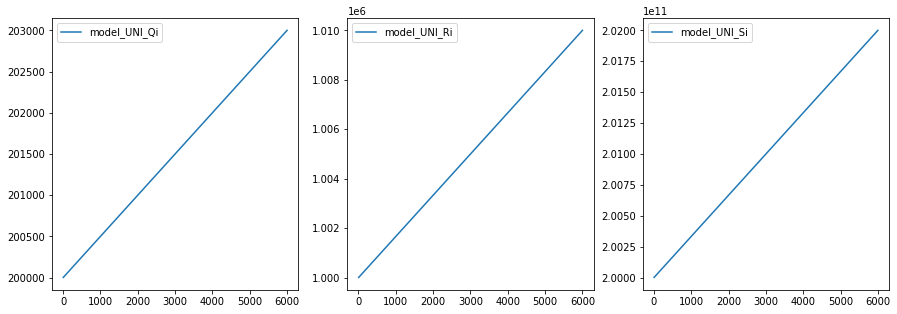

In [11]:
plt.figure(figsize=(15,5))
ax = plt.subplot(131)
model_history.astype(float).plot(ax=ax, y=['model_UNI_Qi'])

ax = plt.subplot(132)
model_history.astype(float).plot(ax=ax, y=['model_UNI_Ri'])

ax = plt.subplot(133)
model_history.astype(float).plot(ax=ax, y=['model_UNI_Si'])


<AxesSubplot:>

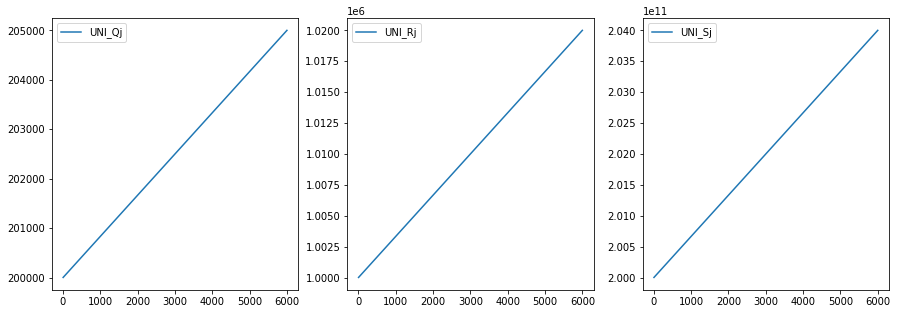

In [12]:
plt.figure(figsize=(15,5))
ax = plt.subplot(131)
uniswap_j.astype(float).plot(ax=ax, y=['UNI_Qj'])
ax = plt.subplot(132)
uniswap_j.astype(float).plot(ax=ax, y=['UNI_Rj'])
ax = plt.subplot(133)
uniswap_j.astype(float).plot(ax=ax, y=['UNI_Sj'])

<AxesSubplot:>

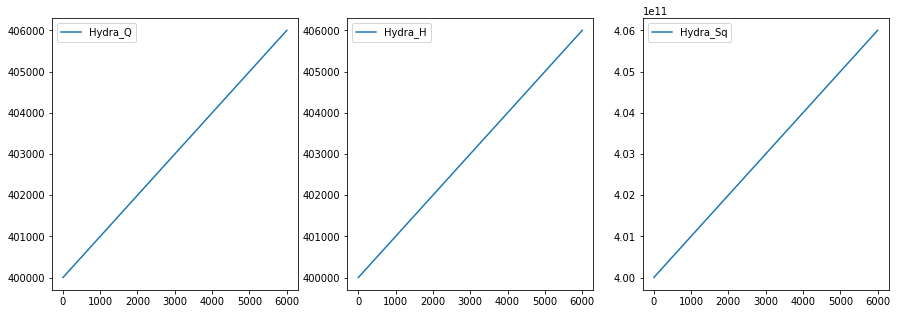

In [13]:
plt.figure(figsize=(15,5))
ax = plt.subplot(131)
hydra.astype(float).plot(ax=ax, y=['Hydra_Q'])

ax = plt.subplot(132) 
hydra.astype(float).plot(ax=ax, y=['Hydra_H'])

ax = plt.subplot(133)
hydra.astype(float).plot(ax=ax, y=['Hydra_Sq'])

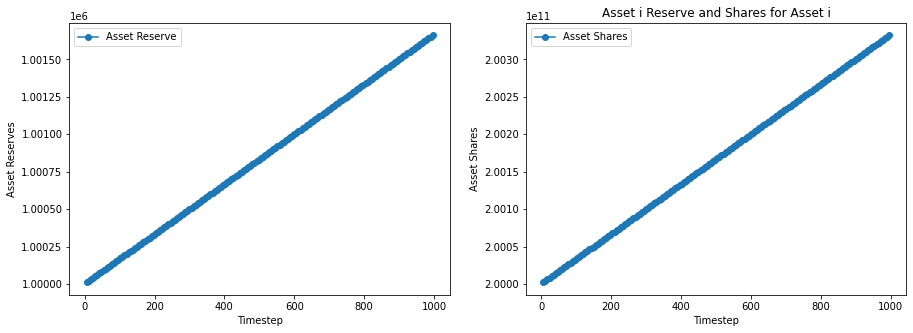

In [14]:
hydra_pool_plot(rdf,'Asset i Reserve and Shares', len(rdf['timestep']),str('i'))

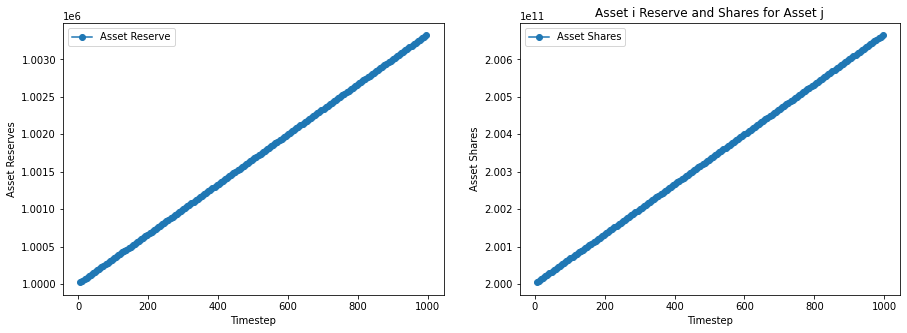

In [15]:
hydra_pool_plot(rdf,'Asset i Reserve and Shares', len(rdf['timestep']),str('j'))

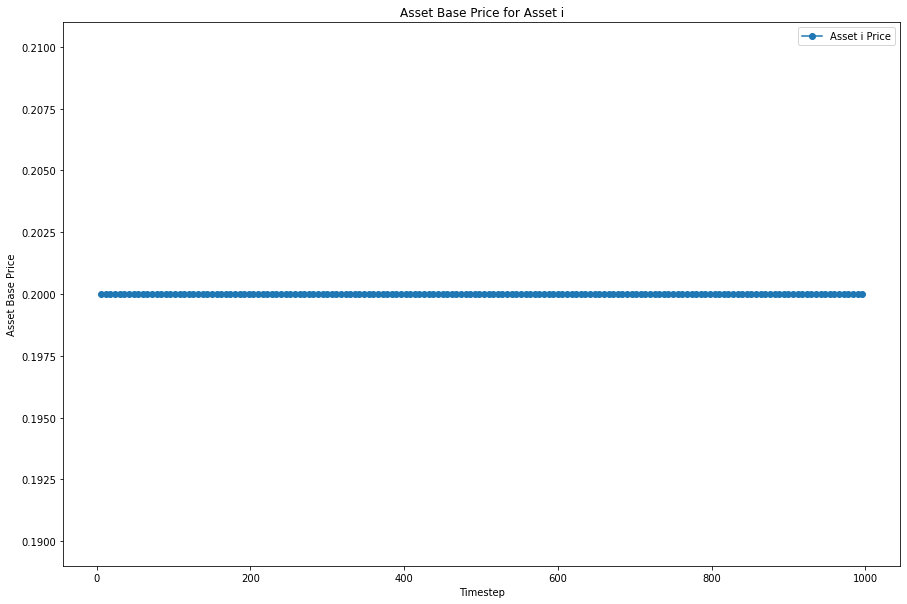

In [16]:
hydra_pool_price_plot(rdf,'Asset Base Price', len(rdf['timestep']),'i')

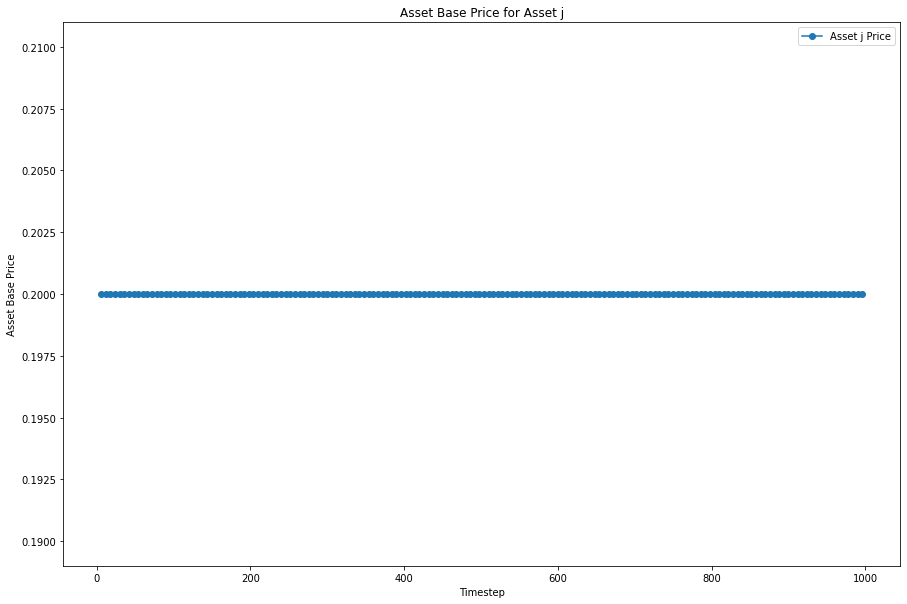

In [17]:
hydra_pool_price_plot(rdf,'Asset Base Price', len(rdf['timestep']),'j')

Only if we look much more closely can we see some deviation

In [18]:
rdf['hydra_agents'][rdf.first_valid_index()]

m   r_i_out   r_i_in         h      q_i           s_i  s_q   r_j_out  \
0 0.00 100000.00     0.00 100000.00     0.00          0.00 0.00      0.00   
1 1.00 100000.00     0.00 100000.00     0.00          0.00 0.00      0.00   
2 2.00  99980.00    20.00  99994.00     2.00    4000000.00 0.00  99960.00   
3 3.00 100000.00 10000.00 100000.00 10000.00 1000000000.00 0.00      0.00   
4 4.00      0.00     0.00 100000.00     0.00          0.00 0.00 100000.00   
5 5.00      0.00     0.00 100000.00     0.00          0.00 0.00 100000.00   
6 6.00      0.00     0.00 100000.00     0.00          0.00 0.00 100000.00   
7 7.00      0.00     0.00 100000.00     0.00 1000000000.00 0.00 100000.00   

    r_j_in      q_j           s_j  
0     0.00     0.00          0.00  
1     0.00     0.00          0.00  
2    40.00     4.00    8000000.00  
3     0.00     0.00 1000000000.00  
4     0.00     0.00          0.00  
5     0.00     0.00          0.00  
6     0.00     0.00          0.00  
7 10000.00 10000.00 1000000000.00

In [19]:
rdf['uni_agents'][rdf.first_valid_index()]

m   r_i_out   r_i_in         h      q_i           s_i  s_q   r_j_out  \
0 0.00 100000.00     0.00 100000.00     0.00          0.00 0.00      0.00   
1 1.00 100000.00     0.00 100000.00     0.00          0.00 0.00      0.00   
2 2.00  99980.00    20.00  99994.00     2.00    4000000.00 0.00  99960.00   
3 3.00 100000.00 10000.00 100000.00 10000.00 1000000000.00 0.00      0.00   
4 4.00      0.00     0.00 100000.00     0.00          0.00 0.00 100000.00   
5 5.00      0.00     0.00 100000.00     0.00          0.00 0.00 100000.00   
6 6.00      0.00     0.00 100000.00     0.00          0.00 0.00 100000.00   
7 7.00      0.00     0.00 100000.00     0.00 1000000000.00 0.00 100000.00   

    r_j_in      q_j           s_j  
0     0.00     0.00          0.00  
1     0.00     0.00          0.00  
2    40.00     4.00    8000000.00  
3     0.00     0.00 1000000000.00  
4     0.00     0.00          0.00  
5     0.00     0.00          0.00  
6     0.00     0.00          0.00  
7 10000.00 10000.00 1000000000.00

In [20]:
rdf['uni_agents'][rdf.first_valid_index()*10]

m   r_i_out   r_i_in         h      q_i           s_i  s_q   r_j_out  \
0 0.00 100000.00     0.00 100000.00     0.00          0.00 0.00      0.00   
1 1.00 100000.00     0.00 100000.00     0.00          0.00 0.00      0.00   
2 2.00  99800.00   200.00  99940.00    20.00   40000000.00 0.00  99600.00   
3 3.00 100000.00 10000.00 100000.00 10000.00 1000000000.00 0.00      0.00   
4 4.00      0.00     0.00 100000.00     0.00          0.00 0.00 100000.00   
5 5.00      0.00     0.00 100000.00     0.00          0.00 0.00 100000.00   
6 6.00      0.00     0.00 100000.00     0.00          0.00 0.00 100000.00   
7 7.00      0.00     0.00 100000.00     0.00 1000000000.00 0.00 100000.00   

    r_j_in      q_j           s_j  
0     0.00     0.00          0.00  
1     0.00     0.00          0.00  
2   400.00    40.00   80000000.00  
3     0.00     0.00 1000000000.00  
4     0.00     0.00          0.00  
5     0.00     0.00          0.00  
6     0.00     0.00          0.00  
7 10000.00 10000.00 1000000000.00

In [21]:
rdf['hydra_agents'][rdf.first_valid_index()*10]

m   r_i_out   r_i_in         h      q_i           s_i  s_q   r_j_out  \
0 0.00 100000.00     0.00 100000.00     0.00          0.00 0.00      0.00   
1 1.00 100000.00     0.00 100000.00     0.00          0.00 0.00      0.00   
2 2.00  99800.00   200.00  99940.00    20.00   40000000.00 0.00  99600.00   
3 3.00 100000.00 10000.00 100000.00 10000.00 1000000000.00 0.00      0.00   
4 4.00      0.00     0.00 100000.00     0.00          0.00 0.00 100000.00   
5 5.00      0.00     0.00 100000.00     0.00          0.00 0.00 100000.00   
6 6.00      0.00     0.00 100000.00     0.00          0.00 0.00 100000.00   
7 7.00      0.00     0.00 100000.00     0.00 1000000000.00 0.00 100000.00   

    r_j_in      q_j           s_j  
0     0.00     0.00          0.00  
1     0.00     0.00          0.00  
2   400.00    40.00   80000000.00  
3     0.00     0.00 1000000000.00  
4     0.00     0.00          0.00  
5     0.00     0.00          0.00  
6     0.00     0.00          0.00  
7 10000.00 10000.00 1000000000.00

In [22]:
rdf['Q'][rdf.first_valid_index()]

400006.0

## Conclusion

In this notebook, we have illustrated how to create a cadCAD model that takes in real data and replicates the mechanics of a real world smart contract extremely acurately by translating the smart contract code into python code. We enforce best practices for cadCAD modeling, and analyze our simulation data against the real data. 

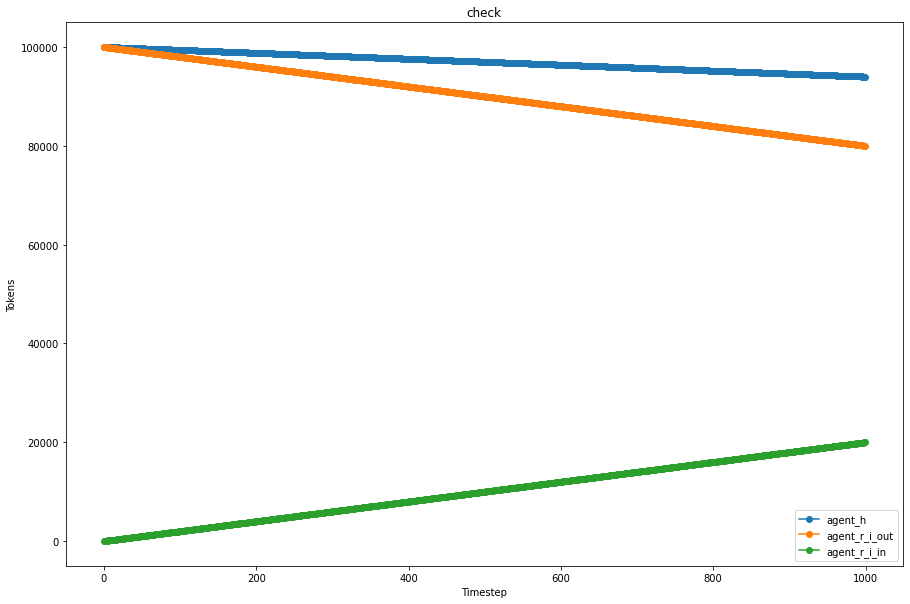

In [23]:
agent_plot(rdf,'check', len(rdf['timestep']),2,'i')

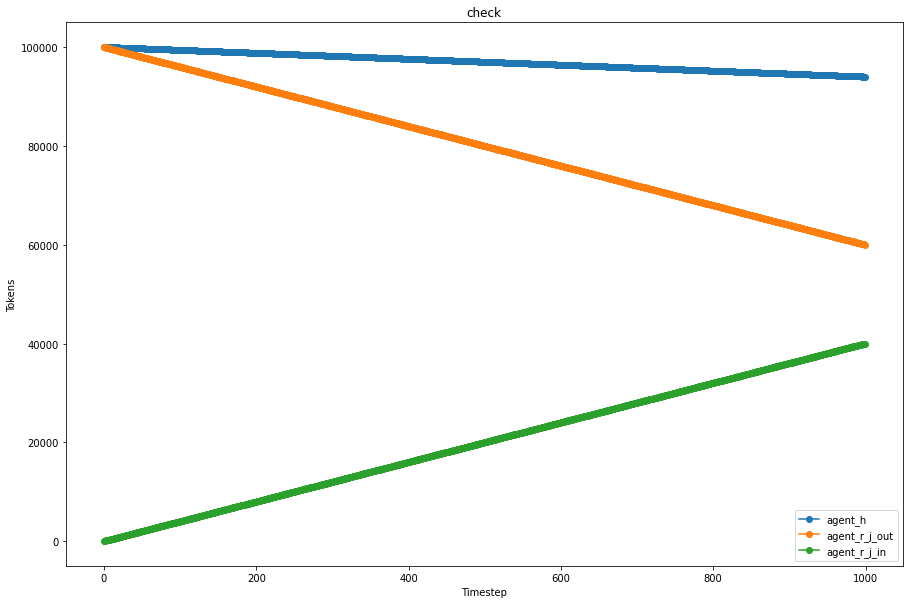

In [24]:
agent_plot(rdf,'check', len(rdf['timestep']),2,'j')

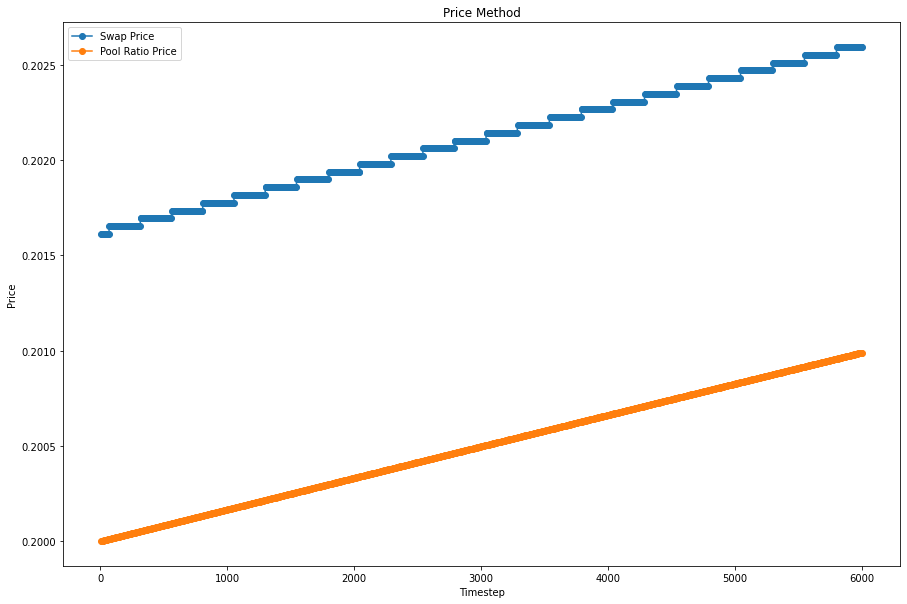

In [25]:
price_plot(rdf,'Price Method', 'UNI_P_RQi', 'UNI_Ri', 'UNI_Qi')

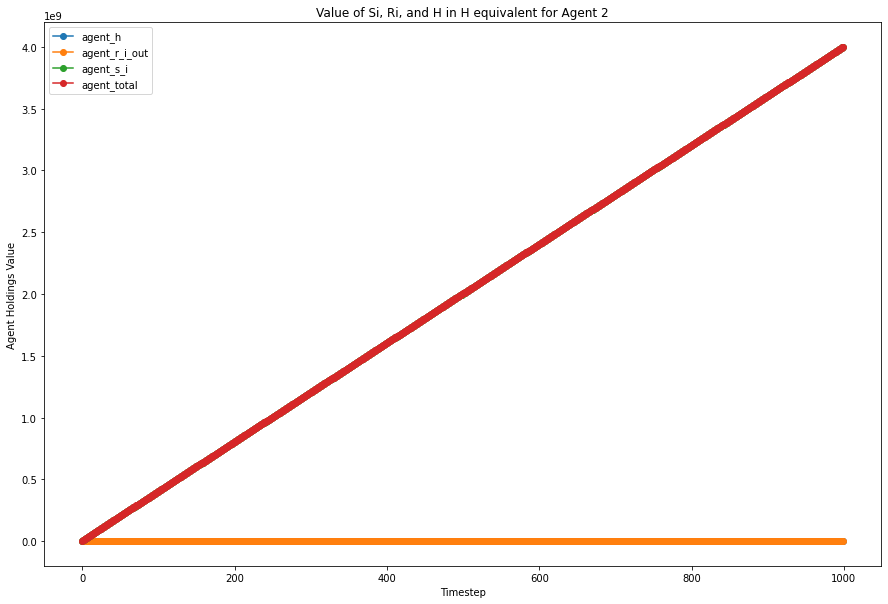

In [26]:
agent_value_plot(rdf,'Value of Si, Ri, and H in H equivalent', len(rdf['timestep']),2, 'i')

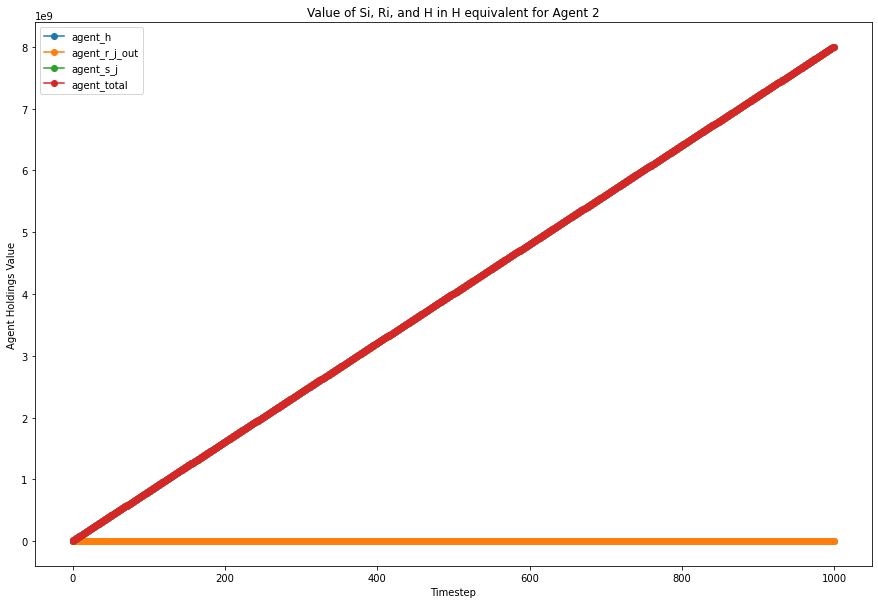

In [27]:
agent_value_plot(rdf,'Value of Si, Ri, and H in H equivalent', len(rdf['timestep']),2, 'j')

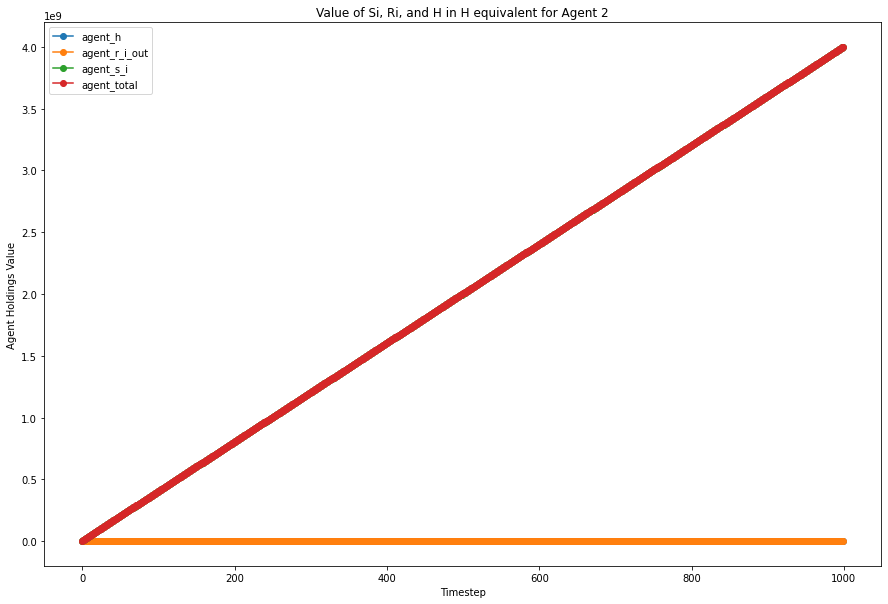

In [28]:
agent_value_plot(rdf,'Value of Si, Ri, and H in H equivalent', len(rdf['timestep']),2,'i')

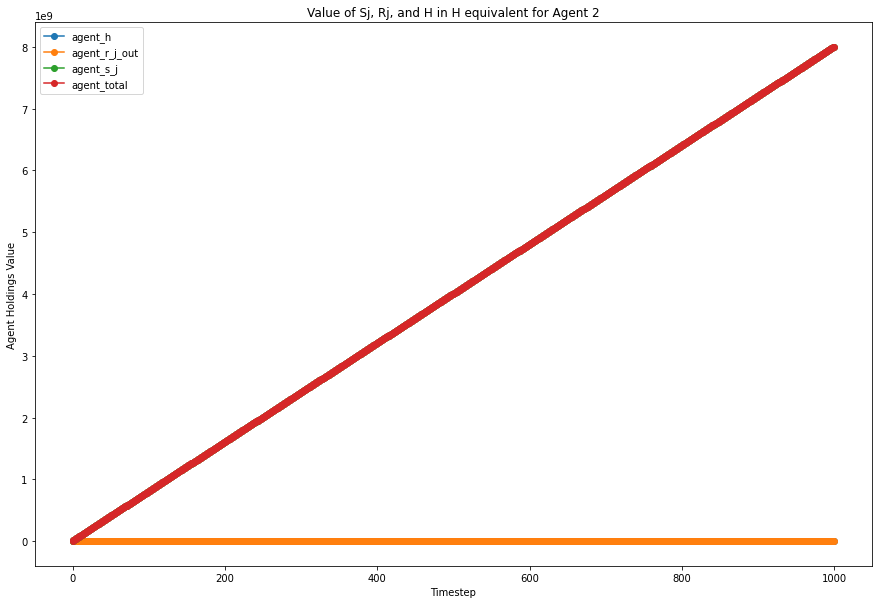

In [29]:
agent_value_plot(rdf,'Value of Sj, Rj, and H in H equivalent', len(rdf['timestep']),2,'j')

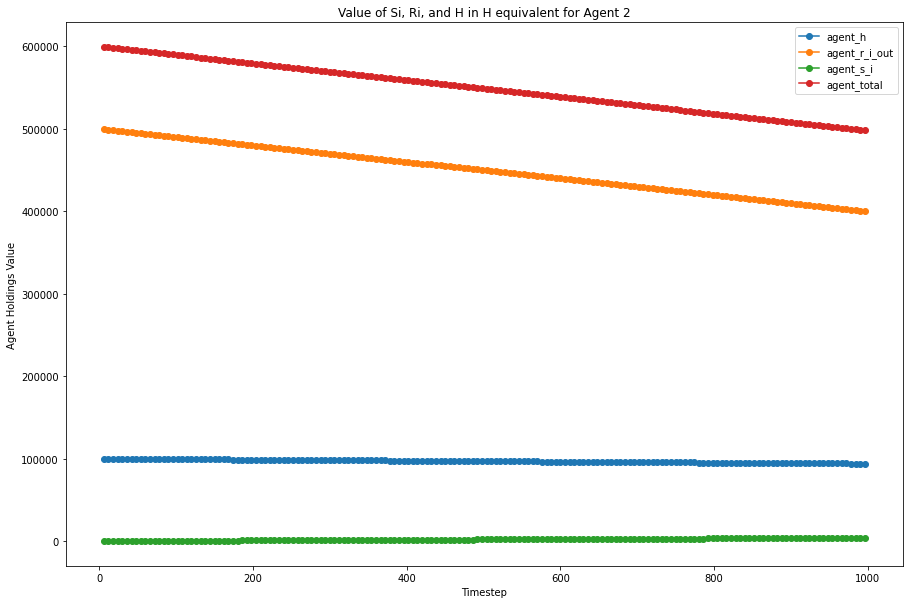

In [30]:
hydra_agent_value_plot(rdf,'Value of Si, Ri, and H in H equivalent', len(rdf['timestep']),2, 'i')

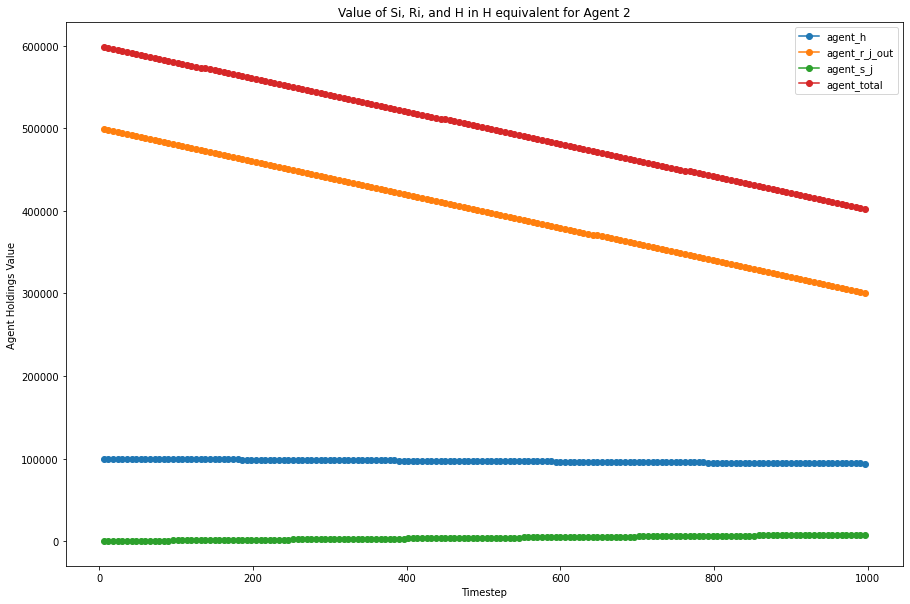

In [31]:
hydra_agent_value_plot(rdf,'Value of Si, Ri, and H in H equivalent', len(rdf['timestep']),2, 'j')